# k-Nearest Neighbors implementation in python
Run this notebook on Google Colab. You can also run this on your local machine by modifying the *path* of data.mat file and test images.


Before running this block, make sure to upload "data.mat" in the google drive.

In [ ]:
# Enter your path of dataset from google drive  
import scipy.io as sio
GOOGLE_COLAB = True

if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/MyDrive/ML KNN Classifier/"

dataset = path + "data.mat" 

test_image_path = path + "test.jpeg"
mat_contents = sio.loadmat(dataset)
images = mat_contents['images']
label = mat_contents['C']


If you can see the shape of images in 'data.mat' then your data has been read. 

In [2]:
print(images.shape, label.shape)

(50, 3072) (50, 1)


In [3]:
import numpy as np 
images = np.transpose(images)
im = np.reshape(images, [ 32, 32, 3, -1], order="F")

(32, 32, 3)


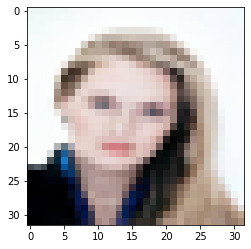

In [4]:
from matplotlib import pyplot as plt
import cv2

plt.imshow(im[:,:,:,24])
print(im[:,:,:,0].shape)

In [8]:
from scipy import misc
import cv2
from math import sqrt
from numpy import ndarray

for i in range(50):
    G = im[:,:,:,i]
    G = np.reshape(G,[-1], order="F")

    # Read your image here

test_image = cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB)
print(type(test_image), test_image.shape)
# plt.figure()
# plt.imshow(test_image)

    #Resize your image

dim = (32, 32)
test_image = test_image[200:700, 275:725]
test_image = cv2.resize(test_image, dim)
print(type(test_image), test_image.shape)
# plt.figure()
# plt.imshow(test_image)

   
    #Reshape your image as we reshape the image of dataset

T = np.reshape(test_image, [-1], order="F")
print(T.shape)

    #Calculate Eucleadian distance between your image and dataset 

sum_result = 0
T = T.astype('float32')
G = G.astype('float32')

for i in range(0, G.shape[0]):
  x = pow((G[i] - T[i]), 2)
  sum_result =  sum_result + x

d = np.sqrt(sum_result)
print('Distance d = ', d)

<class 'numpy.ndarray'> (1280, 960, 3)
<class 'numpy.ndarray'> (32, 32, 3)
(3072,)
Distance d =  5864.137106173423


**1-NN** **implementation**

Minimum Distance (1-NN):  4596.828145580384
You resemble sanam baloch


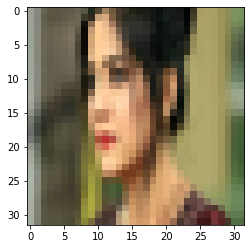

In [9]:
distance_arr = []
for i in range(50):
  G = im[:,:,:,i]
  G = np.reshape(G,[-1], order="F")

  sum_result = 0;
  for i in range(0, G.shape[0]):
    x = (T[i] - G[i])**2
    sum_result =  sum_result + x

  distance_arr.append(sqrt(sum_result))

distance_arr = np.array(distance_arr)
distance_min = min(distance_arr)
print('Minimum Distance (1-NN): ', distance_min)

index_condition = distance_arr == distance_min
distance_min_index = np.where(index_condition)[0]

for data in distance_min_index:
  print('You resemble', label[data][0][0])
  plt.imshow(im[:,:,:, data])


**3-NN** **implementation**


Minimum Distances (3-NN):  [4596.828145580384, 4690.053304601132, 4744.435372096452]
You resemble: 


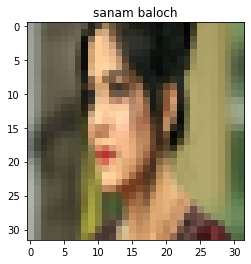

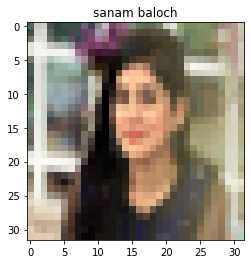

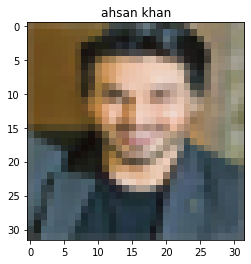

In [10]:
K = 3
distance_arr = []  #-- Array of calculated Distances
for i in range(50):
  G = im[:,:,:,i]
  G = np.reshape(G,[-1], order="F")

  sum_result = 0;
  for i in range(0, G.shape[0]):
    x = (T[i] - G[i])**2
    sum_result =  sum_result + x

  distance_arr.append(sqrt(sum_result))

distance_arr = np.array(distance_arr)
distance_arr_sorted = np.array(distance_arr)
distance_arr_sorted.sort()

d_min = distance_arr_sorted[0: K]
d_min_indices = []

for i in range(K):
  index_condition = (distance_arr == d_min[i])
  distance_min_index = np.where(index_condition)[0]
  d_min_indices.append(distance_min_index)

print('Minimum Distances (3-NN): ', [data for data in d_min])
print('You resemble: ')

for data in d_min_indices:
  plt.figure()
  plt.imshow(im[:,:,:, data[0]])
  plt.title((label[data][0][0][0]))


**5-NN** **implementation**

Minimum Distances (5-NN):  [4596.828145580384, 4690.053304601132, 4744.435372096452, 4779.838177177131, 4783.492238940082]
You resemble: 


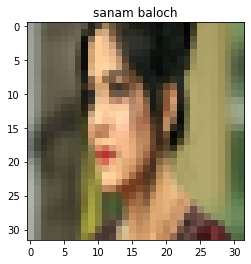

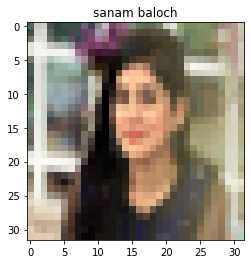

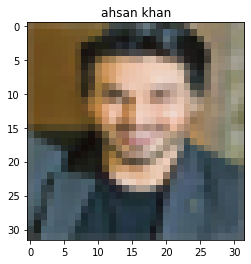

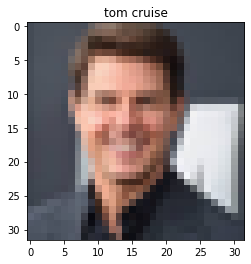

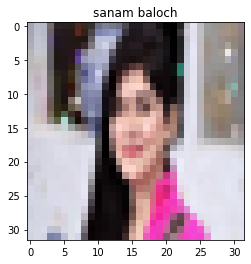

In [11]:
K = 5
d_arr = []
for i in range(50):
  G = im[:,:,:,i]
  G = np.reshape(G,[-1], order="F")

  sum_result = 0;
  for i in range(0, G.shape[0]):
    x = (T[i] - G[i])**2
    sum_result =  sum_result + x

  d_arr.append(sqrt(sum_result))

d_arr = np.array(d_arr)
d_arr_sorted = np.array(d_arr)
d_arr_sorted.sort()

d_min = d_arr_sorted[0: K]
d_min_indices = []
print('Minimum Distances (5-NN): ', [data for data in d_min])
print('You resemble: ')

for i in range(K):
  index_condition = (d_arr == d_min[i])
  distance_min_index = np.where(index_condition)[0]
  d_min_indices.append(distance_min_index)

for data in d_min_indices:
  plt.figure()
  plt.imshow(im[:,:,:, data[0]])
  plt.title((label[data][0][0][0]))


*END*